# Credit Card Approval Classification

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [2]:
credit_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', sep=',', header=None)
credit_data.columns=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed',
                     'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'ApprovalStatus']

In [5]:
credit_data.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
credit_data.describe(include='all')

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [7]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [8]:
credit_data['Gender'].value_counts()

b    468
a    210
?     12
Name: Gender, dtype: int64

### Imputing Missing Variable

In [9]:
def fill_missing(df):
    df.replace('?', np.NaN, inplace=True)
    for col in df.columns:
        if df[col].dtype=='object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        elif df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            print('Data Type error')

fill_missing(credit_data)
    

In [10]:
credit_data.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

### change Data types

In [11]:
# Change Data types
def change_type(df):
    for col in df:
        if col=='Age':
            df[col] = df[col].astype('float64')
        if df[col].dtype=='object':
            df[col] = df[col].astype('category')
        else:
            pass

change_type(credit_data)

In [12]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender            690 non-null category
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null category
BankCustomer      690 non-null category
EducationLevel    690 non-null category
Ethnicity         690 non-null category
YearsEmployed     690 non-null float64
PriorDefault      690 non-null category
Employed          690 non-null category
CreditScore       690 non-null int64
DriversLicense    690 non-null category
Citizen           690 non-null category
ZipCode           690 non-null category
Income            690 non-null int64
ApprovalStatus    690 non-null category
dtypes: category(11), float64(3), int64(2)
memory usage: 43.3 KB


## Exploratory Data Analysis

### Describing data

In [13]:
# Numerical Variable

credit_data.describe()

,Age,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.413420,4.758725,2.223406,2.40000,1017.385507
std,11.910293,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.170000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


In [14]:
credit_data.describe(include='category')

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,ApprovalStatus
count,690,690,690,690,690,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,170,2
top,b,u,g,c,v,t,f,f,g,00000,-
freq,480,525,525,146,408,361,395,374,625,145,383


# Graphs

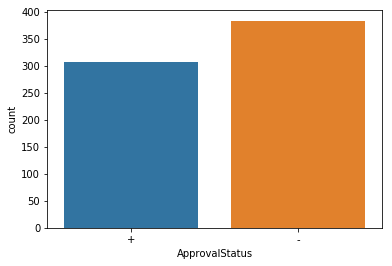

In [15]:
# Target Variable
sns.countplot(data=credit_data, x='ApprovalStatus')

In [16]:
def plotFeatures(df, feature, target=None):
    fig = plt.figure(figsize=(8,12))
    plt.subplot(2,1,1)

    if df[feature].dtype.name=='category':
        sns.countplot(data=df, x=feature)
    elif df[feature].dtype in ['float64', 'int64']:
        sns.distplot(df[feature])
    else:
        pass
        
    
    
    
    if df[feature].dtype.name=='category':
        plt.subplot(2,1,2)
        sns.countplot(x=feature, hue=target, data=df)
    else:
        pass
    

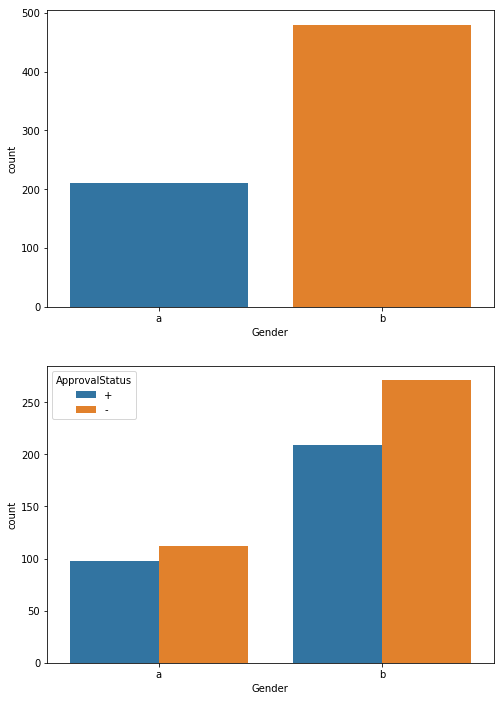

In [17]:
plotFeatures(credit_data, 'Gender', 'ApprovalStatus')

C:\Users\sharm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


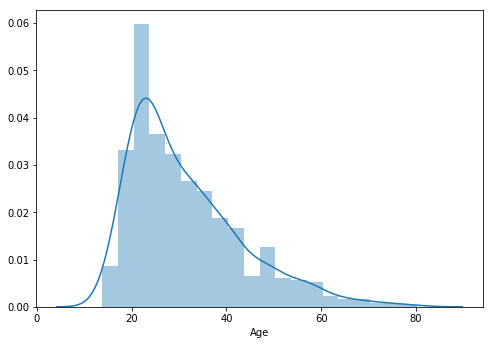

In [18]:
plotFeatures(credit_data, 'Age')

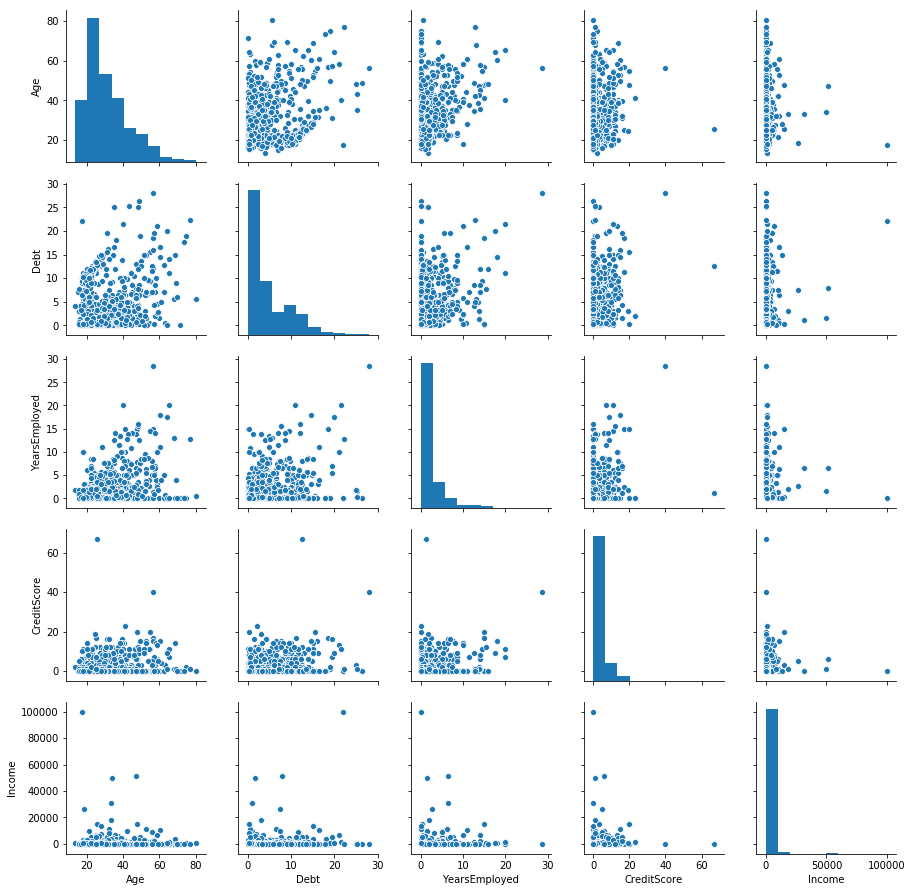

In [19]:
# Find numerical column
num_cols=[]
for cols in credit_data:
    if credit_data[cols].dtype in ['int64', 'float64']:
        num_cols.append(cols)

sns.pairplot(credit_data[num_cols])

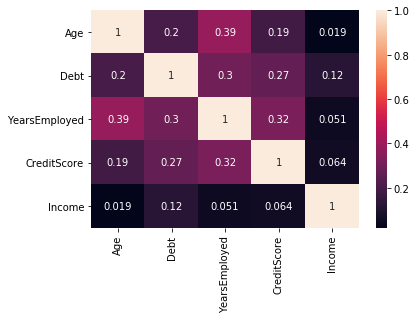

In [21]:
corr = credit_data.corr()
sns.heatmap(corr, annot=True)